# CASE 4 REPORT 
### Introduction

This report is on the prediction of the price of bitcoin 

In [182]:
# import neccesary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Data Exploration

In [183]:
# Load data
bitcoin_data = pd.read_csv('BTC-USD2.csv')
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,14/02/2024,49733.44531,51953.66016,49343.67969,51573.92969,51573.92969,3.989712e+10
1,13/02/2024,49941.35938,50358.39063,48406.49609,49742.44141,49742.44141,3.559305e+10
2,12/02/2024,48296.38672,50280.47656,47745.76172,49958.22266,49958.22266,3.451199e+10
3,11/02/2024,47768.96875,48535.93750,47617.40625,48293.91797,48293.91797,1.931587e+10
4,10/02/2024,47153.52734,48146.17188,46905.32031,47771.27734,47771.27734,1.639868e+10


In [184]:
# sort data by date from later to earlier
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], format='%d/%m/%Y')
bitcoin_data = bitcoin_data.sort_values(by = 'Date')
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3331,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0
3330,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0
3329,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0
3328,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0
3327,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0


In [185]:
# Get more information about the data
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3697 entries, 3331 to 3696
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3332 non-null   datetime64[ns]
 1   Open       3332 non-null   float64       
 2   High       3332 non-null   float64       
 3   Low        3332 non-null   float64       
 4   Close      3332 non-null   float64       
 5   Adj Close  3332 non-null   float64       
 6   Volume     3332 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 231.1 KB


In [186]:
# Check for the number of null
bitcoin_data.isna().sum()

Date         365
Open         365
High         365
Low          365
Close        365
Adj Close    365
Volume       365
dtype: int64

This shows that their are 365 null values in each of those columns listed

In [187]:
# Get the summary statistics for the data
bitcoin_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3332,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3.332000e+03
mean,2019-07-24 12:00:00,15416.339995,15775.534990,15032.748588,15430.377846,15430.377846,1.719896e+10
min,2015-01-01 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,2017-04-12 18:00:00,1223.099975,1239.935028,1207.577515,1223.280029,1223.280029,4.070770e+08
50%,2019-07-24 12:00:00,8788.635254,8957.514160,8573.421387,8790.644043,8790.644043,1.311849e+10
75%,2021-11-03 06:00:00,26303.238280,26720.072265,25913.203128,26329.301757,26329.301757,2.747484e+10
max,2024-02-14 00:00:00,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.510000e+11
std,NaN,16466.845922,16860.166998,16032.268512,16473.783274,16473.783274,1.908799e+10


### Visualisation and KPIs

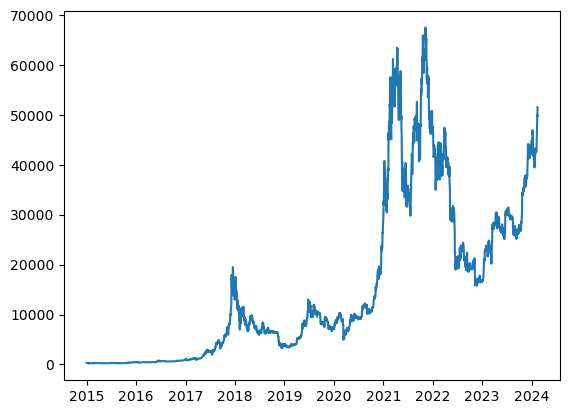

In [188]:
# plot chart to show price trend
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'])
plt.show()

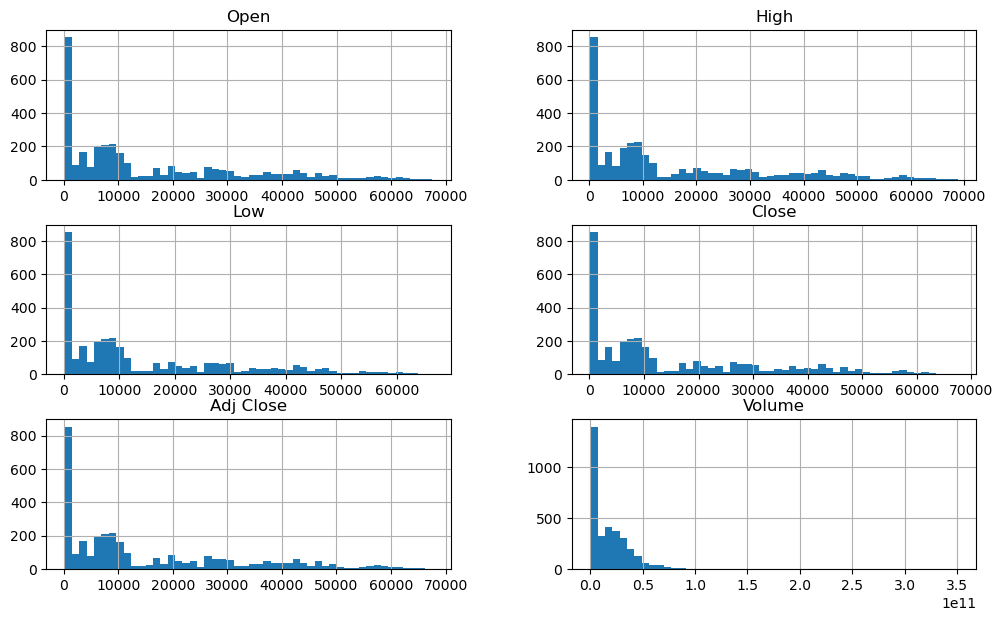

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
bitcoin_data_features = bitcoin_data.drop("Date", axis=1)
bitcoin_data_features.hist(bins=50, figsize=(12,7))
plt.show()

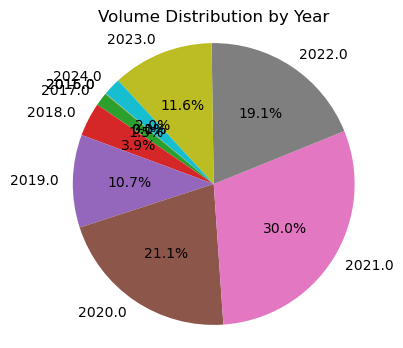

In [227]:
# Pie Chart showing the Volume distribution by year
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], dayfirst=True)
# Extract year from the 'Date' column
bitcoin_data['Year'] = bitcoin_data['Date'].dt.year
# Group by year and sum up the volume
volume_by_year = bitcoin_data.groupby('Year')['Volume'].sum()

plt.figure(figsize=(4, 4))
plt.pie(volume_by_year, labels=volume_by_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Volume Distribution by Year')
plt.axis('equal')  
plt.show()

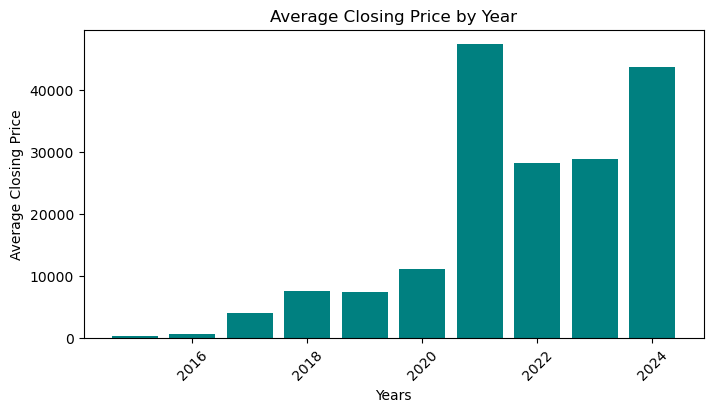

In [191]:
# Plot a bar chart of the average closing Price of each year under consideration
average_close_by_year = bitcoin_data.groupby('Year')['Close'].mean()
# Extract labels (years) and values (average closing prices)
labels = average_close_by_year.index
values = average_close_by_year.values
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color='teal')
plt.xlabel('Years')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price by Year')
plt.xticks(rotation=45) 
#plt.tight_layout() 
plt.show()

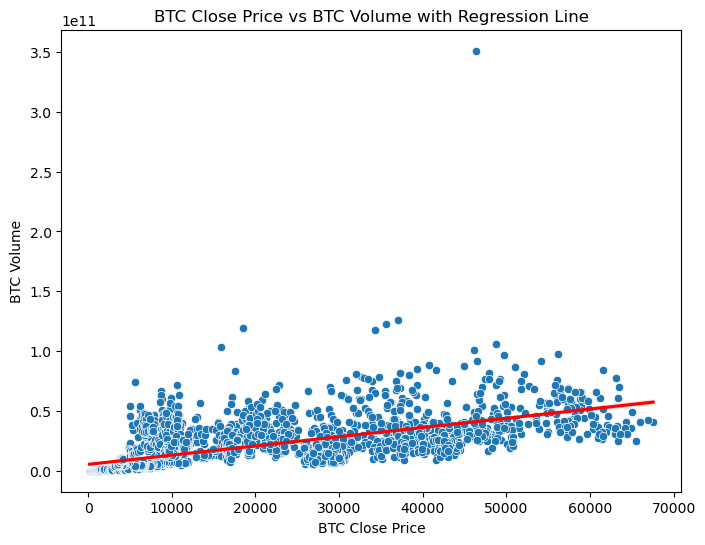

In [192]:
# Scatter plot of the closing price and the volume with a regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bitcoin_data['Close'], y=bitcoin_data['Volume'])
sns.regplot(x=bitcoin_data['Close'], y=bitcoin_data['Volume'], scatter=False, color='red') 
plt.title('BTC Close Price vs BTC Volume with Regression Line')
plt.xlabel('BTC Close Price')
plt.ylabel('BTC Volume')
plt.show()

### Preparing the Data

In [193]:
# Drop Null values
BitC_data = bitcoin_data.dropna()
BitC_data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
Year         False
dtype: bool

#### Feature Engineering 

In [194]:
# Creating attribute for prediction - NextDay Close.  This is the closing price of the next day
BitC_data = BitC_data.copy()
BitC_data["NextDayClose"] = BitC_data['Close'].shift(-1)
BitC_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,NextDayClose
3331,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0,2015.0,315.032013
3330,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0,2015.0,281.082001
3329,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0,2015.0,264.195007
3328,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0,2015.0,274.473999
3327,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0,2015.0,286.188995


In [195]:
# Create a new column that will store the target value
BitC_data.loc[:, "PriceTrend"] = (BitC_data["NextDayClose"] > BitC_data["Open"]).astype(int)
BitC_data["PriceTrend"].value_counts()

PriceTrend
1    1824
0    1508
Name: count, dtype: int64

In [196]:
# Computing new features
# Price change
BitC_data.loc[:, "PriceChange"] = BitC_data["Close"] - BitC_data["Open"]

#Trend Indicators (e.g., 50-day and 200-day moving averages)
window_50days = 50
window_200days = 200
BitC_data.loc[:, "50days_MA"] = BitC_data["Close"].rolling(window=window_50days).mean()
BitC_data.loc[:, "200days_MA"] = BitC_data["Close"].rolling(window=window_200days).mean()

# Price Relative to Moving Averages
BitC_data.loc[:, "Price_vs_50days_MA"] = BitC_data["Close"] - BitC_data["50days_MA"]
BitC_data.loc[:, "Price_vs_200days_MA"] = BitC_data["Close"] - BitC_data["200days_MA"]

# Volatility Indicators (e.g., Bollinger Bands)
window_size = 20
BitC_data.loc[:, "RollingStd"] = BitC_data["Close"].rolling(window=window_size).std()
BitC_data.loc[:, "UpperBand"] = BitC_data["50days_MA"] + 2 * BitC_data["RollingStd"]
BitC_data.loc[:,"LowerBand"] = BitC_data["50days_MA"] - 2 * BitC_data["RollingStd"]

BitC_data = BitC_data.dropna()
BitC_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,NextDayClose,PriceTrend,PriceChange,50days_MA,200days_MA,Price_vs_50days_MA,Price_vs_200days_MA,RollingStd,UpperBand,LowerBand
3132,2015-07-19,274.766998,275.670013,272.513000,273.614014,273.614014,15332500.0,2015.0,278.980988,1,-1.152984,252.227199,247.008470,21.386815,26.605544,14.184152,280.595502,223.858896
3131,2015-07-20,273.498993,278.980988,272.959991,278.980988,278.980988,22711400.0,2015.0,275.833008,1,5.481995,253.203018,246.832130,25.777970,32.148858,13.918339,281.039696,225.366341
3130,2015-07-21,278.881989,280.546997,275.419006,275.833008,275.833008,22930700.0,2015.0,277.221985,0,-3.048981,254.261159,246.636135,21.571849,29.196873,13.313687,280.888533,227.633785
3129,2015-07-22,275.657013,277.665985,274.381012,277.221985,277.221985,19389800.0,2015.0,276.049011,1,1.564972,255.289539,246.616835,21.932446,30.605150,12.331296,279.952130,230.626947
3128,2015-07-23,277.341003,278.110992,275.716003,276.049011,276.049011,18531300.0,2015.0,288.278015,1,-1.291992,256.293039,246.676105,19.755972,29.372906,11.263984,278.821007,233.765071


In [197]:
# Computing the correlation between the predictor features and the target features
corr_BitC_data = BitC_data.corr()

corr_BitC_data
corr_BitC_data["PriceTrend"].sort_values(ascending=False)

PriceTrend             1.000000
PriceChange            0.361113
Price_vs_50days_MA     0.096641
Price_vs_200days_MA    0.051876
RollingStd            -0.022439
NextDayClose          -0.031573
Volume                -0.032087
Year                  -0.045828
Date                  -0.048995
Adj Close             -0.049463
Close                 -0.049463
Low                   -0.057872
High                  -0.058091
UpperBand             -0.066809
Open                  -0.067551
50days_MA             -0.071459
LowerBand             -0.076555
200days_MA            -0.077949
Name: PriceTrend, dtype: float64

In [198]:
# Performing feature scaling with StandardScaler
# Seperate the predictor and target features
ToDrop = ["Date", "PriceTrend"]
predictors = BitC_data.drop(ToDrop, axis=1)
BitC_targ = BitC_data["PriceTrend"]

# Create an instance of the scaler
scaler = StandardScaler()
BitC_pred = pd.DataFrame(scaler.fit_transform(predictors),  columns=predictors.columns)

BitC_pred.head()

,Open,High,Low,Close,Adj Close,Volume,Year,NextDayClose,PriceChange,50days_MA,200days_MA,Price_vs_50days_MA,Price_vs_200days_MA,RollingStd,UpperBand,LowerBand
0,-0.975007,-0.974764,-0.976330,-0.975635,-0.975635,-0.953000,-1.732926,-0.975743,-0.018775,-0.974552,-0.973609,-0.090604,-0.165236,-0.780564,-0.975211,-0.963327
1,-0.975084,-0.974569,-0.976302,-0.975310,-0.975310,-0.952615,-1.732926,-0.975934,-0.010743,-0.974491,-0.973621,-0.089360,-0.164473,-0.780781,-0.975187,-0.963222
2,-0.974757,-0.974476,-0.976149,-0.975500,-0.975500,-0.952604,-1.732926,-0.975850,-0.021070,-0.974426,-0.973634,-0.090551,-0.164879,-0.781274,-0.975195,-0.963065
3,-0.974953,-0.974646,-0.976214,-0.975416,-0.975416,-0.952789,-1.732926,-0.975921,-0.015484,-0.974363,-0.973635,-0.090449,-0.164685,-0.782076,-0.975246,-0.962857
4,-0.974851,-0.974620,-0.976131,-0.975487,-0.975487,-0.952834,-1.732926,-0.975180,-0.018943,-0.974301,-0.973631,-0.091066,-0.164855,-0.782947,-0.975309,-0.962639


##### Feature Importance

In [199]:
# Splitting the dataset into train and test sets
BitC_pred_train, BitC_pred_test, BitC_targ_train, BitC_targ_test = train_test_split(BitC_pred, BitC_targ, test_size=0.25, random_state=42)

rnd_clsf = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

#Training and testing the model
rnd_clsf.fit(BitC_pred_train, BitC_targ_train)
targ_predict = rnd_clsf.predict(BitC_pred_test)

rnd_clsf.feature_importances_

array([0.03861424, 0.02323873, 0.02525366, 0.0201072 , 0.01755429,
       0.02990133, 0.00547404, 0.05417374, 0.56101119, 0.02664695,
       0.03456214, 0.04365235, 0.029524  , 0.03008009, 0.02685837,
       0.03334768])

In [228]:
# Streamlining the dataframe to include just a few features based on the feature importance
selected_features = [ "Open", "PriceChange","200days_MA", "Price_vs_50days_MA", "RollingStd"]
BitC_train = BitC_pred_train[selected_features]
BitC_test = BitC_pred_test[selected_features]
BitC_train.head()

,Open,PriceChange,200days_MA,Price_vs_50days_MA,RollingStd
573,-0.931744,0.001448,-0.941934,-0.079102,-0.745202
3057,1.293318,1.157756,0.939792,1.071031,-0.152251
2848,0.797822,-0.785156,0.450285,0.003072,-0.139404
1213,-0.605562,-0.033963,-0.530766,-0.129868,-0.743195
2093,2.633853,0.416888,1.083109,1.408328,1.115931


### Building Classification Models


Because our target feature has now been converted to binary, we have a classification problem of predicting the probability that the closing price of the next day is either higher than the openinf  price on current day -class 1 or vice versa for class 0

##### Logistic Regression

In [201]:
# Instantiating the model
lg_reg = LogisticRegression()

# perform cross validation on the new train dataset
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_scores = cross_val_score(lg_reg, BitC_train, BitC_targ_train, cv=kf, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean of CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.70638298 0.67234043 0.69787234 0.71914894 0.66808511 0.71489362
 0.7106383  0.67659574 0.71489362 0.70940171]
Mean of CV accuracy: 0.6990252773231497
Standard deviation of CV accuracy: 0.018382130194198067


In [202]:
# Train and test the model
lg_reg.fit(BitC_train, BitC_targ_train)

lg_reg_pred = lg_reg.predict(BitC_test)

# Model Evaluation

# Get precision score
print("Precision Score: ", precision_score(BitC_targ_test, targ_predict))

# Get accuracy score
print("Accuracy Score: ", accuracy_score(BitC_targ_test, lg_reg_pred))

# Get confusion matrix
print("Confusion Matrix:") 
confusion_matrix(BitC_targ_test, targ_predict)

Precision Score:  0.7666666666666667
Accuracy Score:  0.6896551724137931
Confusion Matrix:


array([[246, 105],
       [ 87, 345]], dtype=int64)

##### Random Forest

In [203]:
# perform cross validation on the new train dataset
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rnd_clsf, BitC_train, BitC_targ_train, cv=kf, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean of CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.73191489 0.76170213 0.76170213 0.72765957 0.73617021 0.76170213
 0.77446809 0.74893617 0.76595745 0.72649573]
Mean of CV accuracy: 0.7496708492453172
Standard deviation of CV accuracy: 0.016834709911545787


In [204]:
## Train and test the new dataframe with the already Instantiated Random Forest Classifier

rnd_clsf.fit(BitC_train, BitC_targ_train)
targ_predict = rnd_clsf.predict(BitC_test)

# Model Evaluation

# Get precision score
print("Precision Score: ", precision_score(BitC_targ_test, targ_predict))

# Get accuracy score
print("Accuracy Score: ", accuracy_score(BitC_targ_test, targ_predict))

# Get confusion matrix
print("Confusion Matrix:") 
confusion_matrix(BitC_targ_test, targ_predict)

Precision Score:  0.7622222222222222
Accuracy Score:  0.7496807151979565
Confusion Matrix:


array([[244, 107],
       [ 89, 343]], dtype=int64)

##### Bagging Classifier

In [205]:
# Instantiating the model
bag_clf = BaggingClassifier(
    RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
)

# perform cross validation on the train dataset
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(bag_clf, BitC_train, BitC_targ_train, cv=kf, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean of CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.74893617 0.77021277 0.76595745 0.74893617 0.74893617 0.76170213
 0.7787234  0.74042553 0.75319149 0.73076923]
Mean of CV accuracy: 0.7547790507364975
Standard deviation of CV accuracy: 0.013681557772295364


In [206]:
#Train and test the Bagging Classifier
bag_clf.fit(BitC_train, BitC_targ_train)
targ_bag_pred = bag_clf.predict(BitC_test)
print(accuracy_score(BitC_targ_test, targ_bag_pred))

# Get precision score
print("Precision Score: ", precision_score(BitC_targ_test, targ_bag_pred))

# Get accuracy score
print("Accuracy Score: ", accuracy_score(BitC_targ_test, targ_bag_pred))

# Get confusion matrix
print("Confusion Matrix:") 
confusion_matrix(BitC_targ_test, targ_bag_pred)

0.7458492975734355
Precision Score:  0.7527114967462039
Accuracy Score:  0.7458492975734355
Confusion Matrix:


array([[237, 114],
       [ 85, 347]], dtype=int64)

##### GradientBoosting Classifier

In [207]:
# Instantiating the model
gb_clf = GradientBoostingClassifier(n_estimators=3, learning_rate=0.5, max_depth=1, random_state=0)

# perform cross validation on the train dataset
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_clf, BitC_train, BitC_targ_train, cv=kf, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean of CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.73191489 0.7787234  0.75744681 0.76170213 0.73617021 0.74042553
 0.76595745 0.75744681 0.76170213 0.73931624]
Mean of CV accuracy: 0.7530805601018367
Standard deviation of CV accuracy: 0.01446966593271585


In [208]:
# Train and test the model
gb_clf.fit(BitC_pred_train, BitC_targ_train)
targ_ens_pred = gb_clf.predict(BitC_pred_test)

# Model Evaluation

# Get precision score
print("Precision Score: ", precision_score(BitC_targ_test, targ_ens_pred))

# Get accuracy score
print("Accuracy Score: ", accuracy_score(BitC_targ_test, targ_ens_pred))

# Get confusion matrix
print("Confusion Matrix:") 
confusion_matrix(BitC_targ_test, targ_ens_pred)

Precision Score:  0.7707865168539326
Accuracy Score:  0.756066411238825
Confusion Matrix:


array([[249, 102],
       [ 89, 343]], dtype=int64)

#### Correlation between the price of Gold and Bitcoin

In [223]:
# Load in the Gold dataframe
Au_data = pd.read_csv("Gold.csv")

In [224]:
# Computing the correlation between the predictor features and the target features
corr_Bitc_Au = Bitc_Au.corr()

corr_Bitc_Au
corr_Bitc_Au["PriceTrend"].sort_values(ascending=False)

PriceTrend             1.000000
PriceChange            0.386541
Price_vs_50days_MA     0.129415
Price_vs_200days_MA    0.070365
Au_Close               0.000598
RollingStd            -0.019611
Volume                -0.031999
NextDayClose          -0.033423
Adj Close             -0.050202
Close                 -0.050202
Date                  -0.053854
Low                   -0.060214
High                  -0.060313
Open                  -0.071692
UpperBand             -0.073335
50days_MA             -0.079228
LowerBand             -0.085834
200days_MA            -0.087359
Name: PriceTrend, dtype: float64

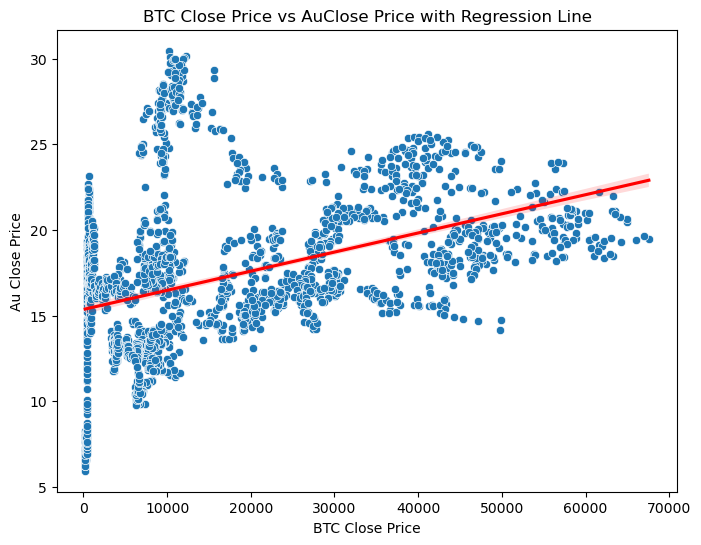

In [225]:
# Scatter plot of the closing price and the volume with a regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Bitc_Au['Close'], y=Bitc_Au['Au_Close'])
sns.regplot(x=Bitc_Au['Close'], y=Bitc_Au['Au_Close'], scatter=False, color='red') 
plt.title('BTC Close Price vs AuClose Price with Regression Line')
plt.xlabel('BTC Close Price')
plt.ylabel('Au Close Price')
plt.show()

In [226]:
# Create a new dataframe consisting the earlier selected features and the close price of Gold  and seperating the predictors from the target
updated_selected_features = [ "Open", "PriceChange","200days_MA", "Price_vs_50days_MA", "RollingStd", "Au_Close"]
Bitc_Au_pred = Bitc_Au[updated_selected_features]
Bitc_Au_targ = Bitc_Au["PriceTrend"]

Bitc_Au_pred, Bitc_Au_targ

(              Open  PriceChange    200days_MA  Price_vs_50days_MA  \
 0       273.498993     5.481995    246.832130           25.777970   
 1       278.881989    -3.048981    246.636135           21.571849   
 2       275.657013     1.564972    246.616835           21.932446   
 3       277.341003    -1.291992    246.676105           19.755972   
 4       276.005005    12.273010    246.745125           30.705896   
 ...            ...          ...           ...                 ...   
 2153  43090.019530  1228.203130  34442.675840         1330.068207   
 2154  44332.125000   969.441410  34518.760977         2280.425628   
 2155  45297.382810  1849.816410  34608.612393         4060.497501   
 2156  48296.386720  1661.835940  34899.764219         6566.123831   
 2157  49941.359380  -198.917970  35001.880196         6227.756566   
 
        RollingStd  Au_Close  
 0       13.918339      7.41  
 1       13.313687      7.50  
 2       12.331296      7.36  
 3       11.263984      7.07  
 4 

##### Build the Gradient Boosting Classifier for this Dataset

In [218]:
#splitting the dataset into testing and training set
Bitc_Au_pred_train, Bitc_Au_pred_test, Bitc_Au_targ_train, Bitc_Au_targ_test = train_test_split(Bitc_Au_pred, Bitc_Au_targ, test_size=0.25, random_state=42)

# Use the already instantiated Gradient Boosting Classifier

# perform cross validation on the train dataset
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_clf, Bitc_Au_pred_train, Bitc_Au_targ_train, cv=kf, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean of CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

Cross-validation scores: [0.72839506 0.75308642 0.74074074 0.7962963  0.7962963  0.77160494
 0.82098765 0.7345679  0.77639752 0.7515528 ]
Mean of CV accuracy: 0.7669925619200981
Standard deviation of CV accuracy: 0.028990801673196783


In [219]:
# Train and test the model
gb_clf.fit(Bitc_Au_pred_train, Bitc_Au_targ_train)
new_targ_pred = gb_clf.predict(Bitc_Au_pred_test)

# Model Evaluation

# Get precision score
print("Precision Score: ", precision_score(Bitc_Au_targ_test, new_targ_pred))

# Get accuracy score
print("Accuracy Score: ", accuracy_score(Bitc_Au_targ_test, new_targ_pred))

# Get confusion matrix
print("Confusion Matrix:") 
confusion_matrix(Bitc_Au_targ_test, new_targ_pred)

Precision Score:  0.7903225806451613
Accuracy Score:  0.7907407407407407
Confusion Matrix:


array([[182,  65],
       [ 48, 245]], dtype=int64)